In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.00,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.00,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.80,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.00,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.00,0.00,NaN,29
5,50349,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,64,THAILAND,49.50,29.70,NaN,36
6,9921,JZI,Airlines,Online,Value Plan,0,23,JAPAN,-69.00,24.15,F,26
7,21923,JZI,Airlines,Online,Basic Plan,0,31,HONG KONG,26.00,9.10,M,60
8,2236,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,5,AUSTRALIA,19.80,11.88,NaN,57
9,14486,EPX,Travel Agency,Online,Cancellation Plan,0,100,INDONESIA,21.00,0.00,NaN,47


In [4]:
df.shape

(50553, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision (in value)    50553 non-null float64
Gender                  14600 non-null object
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [6]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [7]:
df.describe()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,31679.740134,0.014658,49.425969,40.800977,9.83809,40.011236
std,18288.265350,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,15891.000000,0.000000,9.000000,18.000000,0.00000,35.000000
50%,31657.000000,0.000000,22.000000,26.500000,0.00000,36.000000
75%,47547.000000,0.000000,53.000000,48.000000,11.55000,44.000000
max,63325.000000,1.000000,4881.000000,810.000000,283.50000,118.000000


In [8]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [9]:
df.drop("ID", axis = 1, inplace = True)

In [10]:
df["Gender"].unique()

array([nan, 'F', 'M'], dtype=object)

In [11]:
df.drop(["Gender"], axis = 1, inplace = True)

In [12]:
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

In [13]:
##Seperating numerical and categorical columns
df_num = df.select_dtypes(["int64","float64"])
df_cat = df.select_dtypes("object")

In [14]:
df.groupby(["Agency"]).mean()

,Claim,Duration,Net Sales,Commision (in value),Age
Agency,,,,,
ADM,0.000000,52.349206,54.301587,36.998730,24.380952
ART,0.003676,31.330882,28.857390,10.685956,61.143382
C2B,0.066204,95.649223,79.253855,20.572378,37.854019
CBH,0.012346,94.777778,26.716049,9.940741,57.000000
CCR,0.018987,59.854430,30.601266,10.280127,67.126582
CSR,0.014706,81.867647,33.808824,11.156912,57.323529
CWT,0.009942,41.161257,42.907237,32.254026,40.302632
EPX,0.005428,39.222984,32.533248,0.000000,36.952932
JWT,0.004950,30.229373,54.087459,22.010561,118.000000


In [15]:
df.groupby(['Agency Type']).mean()

,Claim,Duration,Net Sales,Commision (in value),Age
Agency Type,,,,,
Airlines,0.03391,67.832308,53.31392,15.584039,45.096294
Travel Agency,0.00730,42.391552,36.01886,7.642139,38.067861


In [16]:
df.groupby(['Distribution Channel']).mean()

,Claim,Duration,Net Sales,Commision (in value),Age
Distribution Channel,,,,,
Offline,0.019144,79.864865,36.808637,9.103682,56.434685
Online,0.014578,48.881728,40.872359,9.851221,39.717588


## Clean Data

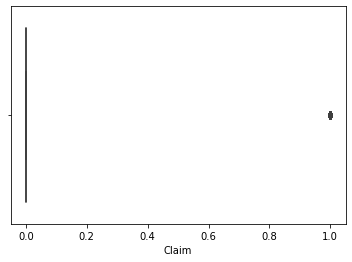

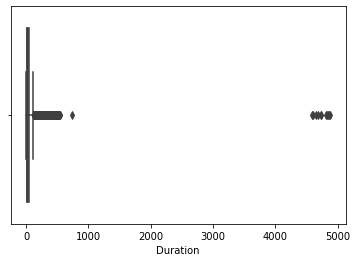

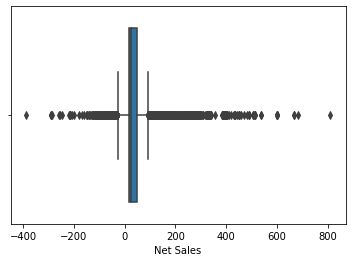

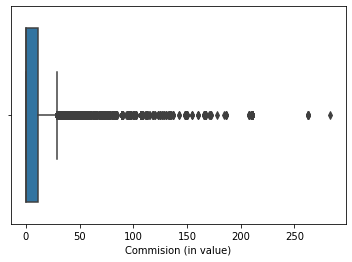

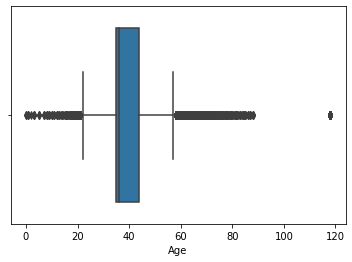

In [17]:
for col in df_num:
 plt.figure()
 sns.boxplot(df_num[col])
 plt.show

Claim - 8.076976414369875


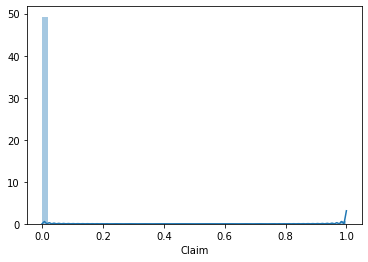

Duration - 22.872063891229274


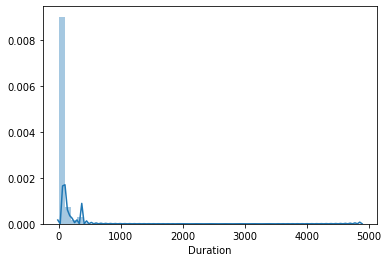

Net Sales - 3.3281441910342053


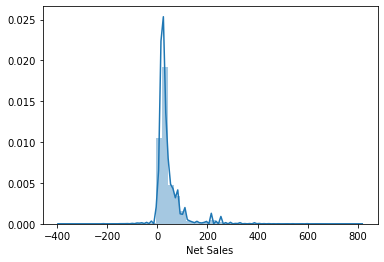

Commision (in value) - 4.0780684356634636


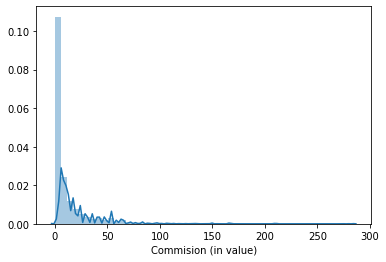

Age - 2.9783898494112435


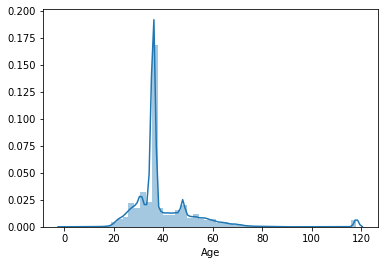

In [18]:
for col in df_num:
  print(col,"-", skew(df_num[col]))
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()

# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
for col in df_cat:
 le = LabelEncoder()
 df_cat[col] = le.fit_transform(df_cat[col])

In [21]:
df_new = pd.concat([df_num,df_cat], axis=1)

Some of data in some of columns are suspicious. If needed, we will transform the value of the data. Like Duration, negative values are strange. And, in age column, only 118 appears.

In [22]:
df[df["Duration"] <0]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
4063,JZI,Airlines,Online,Basic Plan,0,-1,BRUNEI DARUSSALAM,18.0,6.3,118
38935,JZI,Airlines,Online,Basic Plan,0,-1,INDONESIA,18.0,6.3,118
48367,JZI,Airlines,Online,Basic Plan,0,-2,BANGLADESH,22.0,7.7,118


In [23]:
df[df["Age"] > 100]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
90,JWT,Airlines,Online,Value Plan,0,58,INDIA,78.0,31.20,118
108,JWT,Airlines,Online,Value Plan,0,15,INDIA,31.0,12.40,118
140,JWT,Airlines,Online,Value Plan,0,8,INDIA,39.0,15.60,118
153,JWT,Airlines,Online,Value Plan,0,4,INDIA,78.0,31.20,118
181,JWT,Airlines,Online,Value Plan,0,0,INDIA,31.0,12.40,118
321,EPX,Travel Agency,Offline,2 way Comprehensive Plan,1,10,MALAYSIA,20.0,0.00,118
392,JWT,Airlines,Online,Value Plan,0,19,INDIA,31.0,12.40,118
610,EPX,Travel Agency,Offline,2 way Comprehensive Plan,0,13,CHINA,20.0,0.00,118
704,ART,Airlines,Online,Value Plan,0,42,HONG KONG,61.0,21.35,118
731,JZI,Airlines,Online,Basic Plan,0,115,HONG KONG,40.0,14.00,118


In [24]:
df['Duration'].describe()

count    50553.000000
mean        49.425969
std        101.434647
min         -2.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

In [25]:
df['Age'].describe()

count    50553.000000
mean        40.011236
std         14.076566
min          0.000000
25%         35.000000
50%         36.000000
75%         44.000000
max        118.000000
Name: Age, dtype: float64

In [26]:
df.loc[df['Duration'] < 0, 'Duration'] = 49.425
df.loc[df['Age'] > 100, 'Age'] = 40.011

In [27]:
df.describe()

,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,0.014658,49.428981,40.800977,9.83809,38.784775
std,0.120180,101.433893,48.899683,19.91004,10.049564
min,0.000000,0.000000,-389.000000,0.00000,0.000000
25%,0.000000,9.000000,18.000000,0.00000,35.000000
50%,0.000000,22.000000,26.500000,0.00000,36.000000
75%,0.000000,53.000000,48.000000,11.55000,42.000000
max,1.000000,4881.000000,810.000000,283.50000,88.000000


In [28]:
print("Claimed")
print(df[df["Claim"] == 1]["Claim"].count())
print("Not Claimed")
print(df[df["Claim"] == 0]["Claim"].count())

Claimed
741
Not Claimed
49812


Imbalanced dataset appears here. Oversample method will be performed to deal with imblancing problems. Before resampling, data visualization is executed first to know potential relationship.

## Data Visualization

The following graph is to make sure whether claimed policies just occur in few of agencies. From this graph, it distributed evenly.

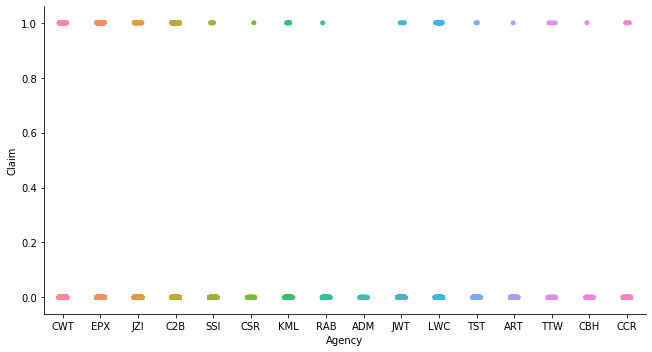

In [29]:
g = sns.catplot(x="Agency",y = "Claim", data=df)
g.fig.set_size_inches(10,5)

In [30]:
claimeddata = df[df["Claim"]==1]


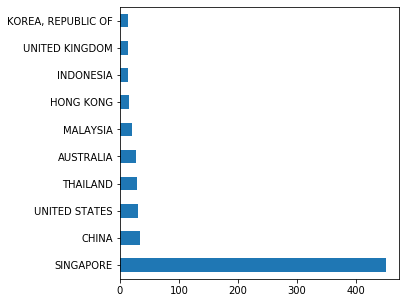

In [31]:
claimeddata['Destination'].value_counts().head(10).plot(kind='barh', figsize=(5,5))

In the below graph, we want to discover whether specific agency companies lead to an increase in the numbers of claimed policies. In this figure, clearly no moral hazard happens here. Since in gernal one, EPX has more sold policies, but it does not lead to more claimed policies.

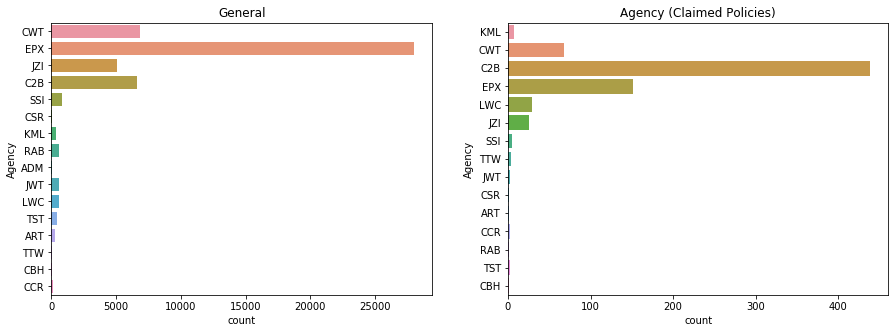

In [32]:
f, axes = plt.subplots(1, 2)
f.set_size_inches(15,5)
axes[0].set_title('General')
axes[1].set_title('Agency (Claimed Policies)')
sns.countplot(y="Agency", data=df, ax = axes[0])
sns.countplot(y="Agency", data=claimeddata, ax = axes[1])

Different policy plans have different coverage. Some of plans cover most of types of injury or disease, so the possibility of claims

In [33]:
a = pd.DataFrame(df.loc[:, "Product Name"].value_counts())
b = pd.DataFrame(claimeddata.loc[:, "Product Name"].value_counts())
combined = a.join(b, lsuffix = "_general", rsuffix = "_claimed")
combined.fillna(0, inplace = True)
combined


,Product Name_general,Product Name_claimed
Cancellation Plan,14872,33.0
2 way Comprehensive Plan,10482,111.0
Rental Vehicle Excess Insurance,6840,68.0
Basic Plan,4376,19.0
Bronze Plan,3246,162.0
1 way Comprehensive Plan,2648,8.0
Value Plan,2169,15.0
Silver Plan,1789,118.0
Annual Silver Plan,1156,128.0
Ticket Protector,839,5.0


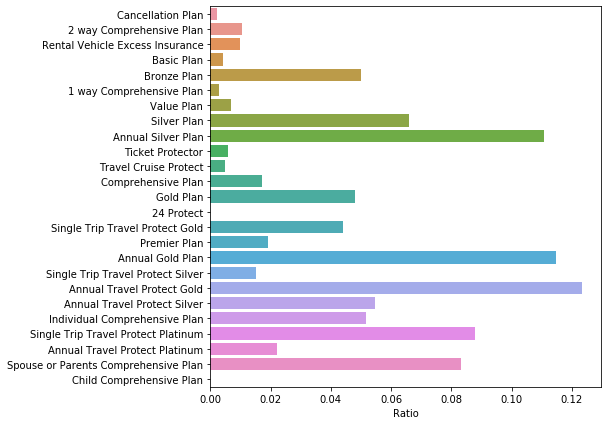

In [34]:
ratio_list = []
for i in range(len(combined)):
    ratio_list.append(combined.iloc[i][1] / combined.iloc[i][0])
ratio = pd.DataFrame(ratio_list, index = np.array(combined.index))
ratio = ratio.rename(columns = {0:"Ratio"})

plt.figure(figsize=(7,7))
sns.barplot(data = ratio, y = ratio.index, x = "Ratio")

From the above Ratio figure, we know different policies have different rate of being claimed.



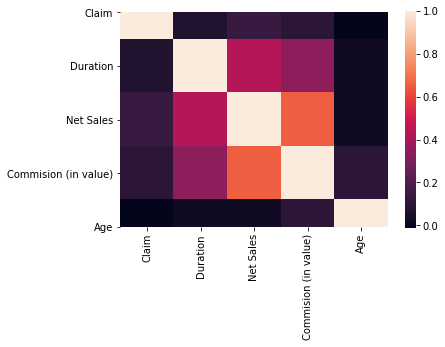

In [35]:
sns.heatmap(df.corr(), square=True)

## Training Dataset and Testing Dataset


In [36]:
X = df.drop(columns=['Claim'])
y = df['Claim']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Oversampling

Oversampling methods should be performed in that the number of claimed policies is much less than non-claimed ones. So oversampling methods are used to address this issue.

In [39]:
updated_X = X_train.drop(columns = ["Agency", "Agency Type", "Distribution Channel", "Product Name", "Destination"])

In [40]:
from imblearn.over_sampling import RandomOverSampler

In [41]:
ros = RandomOverSampler(random_state=0)

In [42]:
X_resampled, y_resampled = ros.fit_resample(updated_X, y_train)

In [43]:
(unique, counts) = np.unique(y_resampled, return_counts=True)
(unique, counts)

(array([0, 1], dtype=int64), array([33377, 33377], dtype=int64))

## Model Building

In [44]:
X_test_updated = X_test.drop(columns = ["Agency", "Agency Type", "Distribution Channel", "Product Name", "Destination"])


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
clf = LogisticRegression(random_state=0).fit(X_resampled, y_resampled)

In [47]:
y_pred = clf.predict(X_test_updated)

Accuracy is around 65%. Since we do not have more features, it seems that we still need some features to improve accuracy.



In [48]:
clf.score(X_resampled, y_resampled)

0.6618629595230249

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test, y_pred)

array([[13353,  3082],
       [  135,   113]], dtype=int64)

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, y_pred, target_names = ["Claimed", "Non-claimed"]))

              precision    recall  f1-score   support

     Claimed       0.99      0.81      0.89     16435
 Non-claimed       0.04      0.46      0.07       248

    accuracy                           0.81     16683
   macro avg       0.51      0.63      0.48     16683
weighted avg       0.98      0.81      0.88     16683



## Cross-Validation
To avoid the overfitting problem, we will perform cross-validation method to check our accuracy score. But the result shows that our accruacy scores are around 65%

In [53]:
from sklearn.model_selection import cross_validate

In [54]:
cv_results = cross_validate(clf, X_resampled, y_resampled, cv=10)

In [55]:
cv_results['test_score']

array([0.67016177, 0.65383463, 0.66027561, 0.66791492, 0.65722846,
       0.66277154, 0.6623221 , 0.65782772, 0.65588015, 0.66696629])